In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
from scipy.optimize import leastsq
from scipy import stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicSpline
import scipy as sp
import math
import seaborn

# 绘制正态分布概率密度函数

(51,)
x = 
 [-3.   -2.88 -2.76 -2.64 -2.52 -2.4  -2.28 -2.16 -2.04 -1.92 -1.8  -1.68
 -1.56 -1.44 -1.32 -1.2  -1.08 -0.96 -0.84 -0.72 -0.6  -0.48 -0.36 -0.24
 -0.12  0.    0.12  0.24  0.36  0.48  0.6   0.72  0.84  0.96  1.08  1.2
  1.32  1.44  1.56  1.68  1.8   1.92  2.04  2.16  2.28  2.4   2.52  2.64
  2.76  2.88  3.  ]
(51,)
y = 
 [ 0.00443185  0.00630673  0.00884645  0.01223153  0.0166701   0.02239453
  0.02965458  0.03870686  0.04980009  0.06315656  0.07895016  0.09728227
  0.1181573   0.14145997  0.16693704  0.19418605  0.2226535   0.25164434
  0.28034381  0.30785126  0.3332246   0.35553253  0.37391061  0.38761662
  0.39608021  0.39894228  0.39608021  0.38761662  0.37391061  0.35553253
  0.3332246   0.30785126  0.28034381  0.25164434  0.2226535   0.19418605
  0.16693704  0.14145997  0.1181573   0.09728227  0.07895016  0.06315656
  0.04980009  0.03870686  0.02965458  0.02239453  0.0166701   0.01223153
  0.00884645  0.00630673  0.00443185]


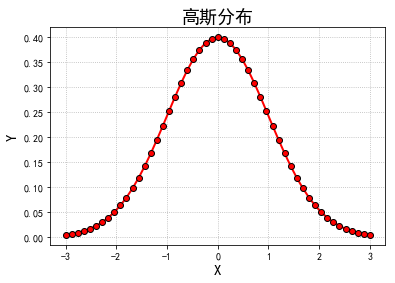

In [7]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']    #设置字体为雅黑
mpl.rcParams['axes.unicode_minus'] = False

mu = 0      #set μ = 0
sigma = 1   #set σ = 1

x= np.linspace(mu - 3 * sigma, mu + 3 * sigma, 51)    #6σ内生成51个点
y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
print(x.shape)
print('x = \n', x)
print(y.shape)
print('y = \n', y)

plt.figure(facecolor = 'w')
plt.plot(x, y, 'ro-', lw = 2, mec = 'k')    #设置线宽2，黑色框
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.title(u'高斯分布', fontsize = 18)
plt.grid(True, ls = ':')
plt.show()


## 损失函数

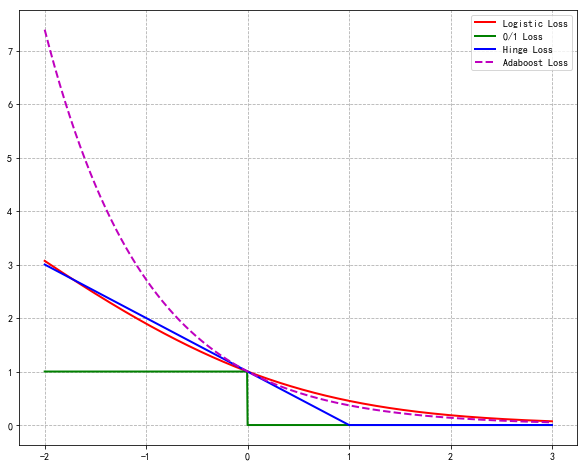

In [20]:
plt.figure(figsize = (10, 8))
x = np.linspace(start = -2, stop = 3, num = 1001, dtype = np.float)
y_logit = np.log(1 + np.exp(-x)) / math.log(2)
y_boost = np.exp(-x)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0
plt.plot(x, y_logit, 'r-', mec = 'k', label='Logistic Loss', linewidth=2)
plt.plot(x, y_01, 'g-', mec = 'k', label='0/1 Loss', linewidth=2)
plt.plot(x, y_hinge, 'b-', mec = 'k', label='Hinge Loss', linewidth=2)
plt.plot(x, y_boost, 'm--', mec = 'k', label='Adaboost Loss', linewidth=2)
plt.grid(True, ls = '--')
plt.legend(loc='upper right')
plt.show()

# x^x

(101,)


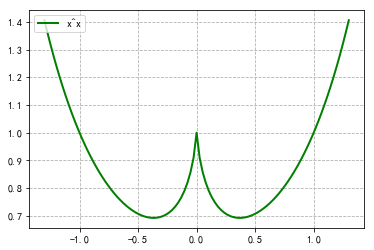

In [28]:
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])    #x > 0则 y = x^x
    i = x < 0
    y[i] = np.power(-x[i], -x[i])  #x < 0则 y = -x^-x(对称操作)
    return y
plt.figure(facecolor = 'w')
x = np.linspace(-1.3, 1.3, 101)
print(x.shape)
y = f(x)
plt.plot(x, y, 'g-', label = 'x^x', linewidth = 2)
plt.grid(True, ls = '--')
plt.legend(loc = 'upper left')
plt.show()

# 均匀分布

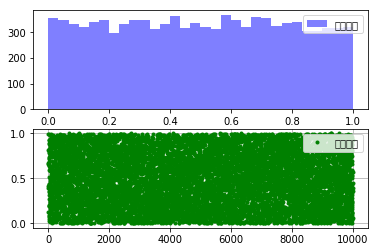

Wall time: 311 ms


In [11]:
%%time
x = np.random.rand(10000)
t = np.arange(len(x))
plt.subplot(211)
plt.hist(x, 30, color = 'b', alpha = 0.5, label = u'均匀分布')
plt.legend(loc = 'best')
plt.subplot(212)
plt.plot(t, x, 'g.', label = u'均匀分布')
plt.legend(loc = 'best')
plt.grid()
plt.show()

## 验证中心极限定理

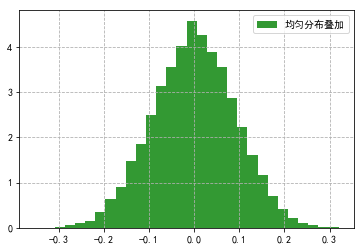

In [8]:
t = 1000
a = np.zeros(10000)
for i in range(t):
    a += np.random.uniform(-5, 5, 10000)
a /= t
plt.hist(a, 30, color='g', alpha=0.8, normed=True, label=u'均匀分布叠加')
plt.legend(loc = 'best')
plt.grid(True, ls = '--')
plt.show()

## 泊松分布

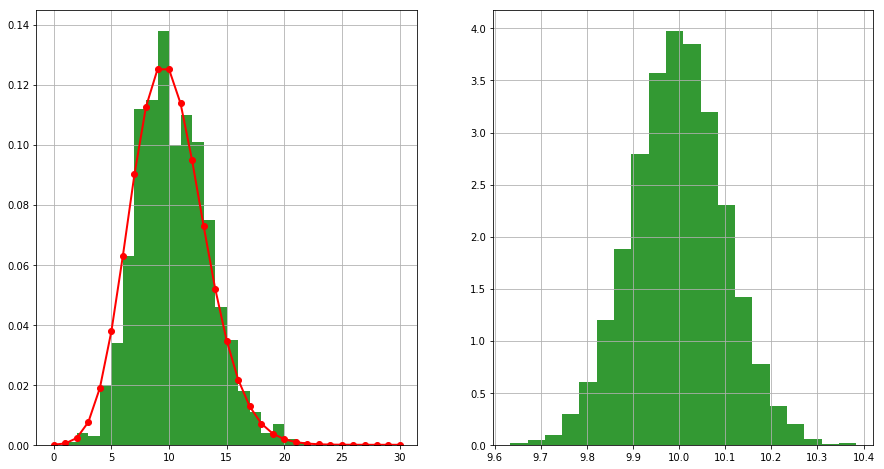

Wall time: 1.92 s


In [10]:
%%time
lamda = 10
p = stats.poisson(lamda)
y = p.rvs(size = 1000)
mx = 30
r = (0, mx)
bins = r[1] - r[0]
plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.hist(y, bins=bins, range=r, color='g', alpha=0.8, normed=True)
t = np.arange(0, mx+1)
plt.plot(t, p.pmf(t), 'ro-', lw=2)
plt.grid(True)

N = 1000
M = 10000
plt.subplot(122)
a = np.zeros(M, dtype=np.float)
p = stats.poisson(lamda)
for i in np.arange(N):
    a += p.rvs(size=M)
a /= N
plt.hist(a, bins=20, color='g', alpha=0.8, normed=True)
plt.grid(b=True)
plt.show()

## 线性回归1

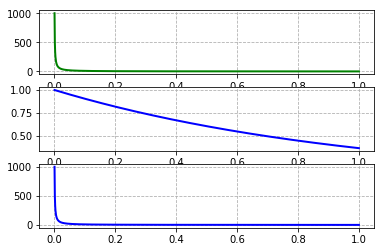

In [45]:
# %%time
x = np.linspace(0.001, 1, 1000)
y = 1 / x
t = np.exp(-x)

plt.subplot(311)
plt.plot(x, y, 'g-', label = '1 / x', linewidth = 2)
plt.grid(True, ls = '--')
plt.subplot(312)
plt.plot(x, t,  'b-', label = 'e ^ - x', linewidth = 2)
plt.grid(True, ls = '--')
plt.subplot(313)
plt.plot(x, y - t,  'b-', label = 'e ^ - x', linewidth = 2)
plt.grid(True, ls = '--')
plt.show()

## 最小二乘线性回归

2 2
2.0 2.0
2.0 2.0
2.0000000298 2.0
2.0 2.0000000298
2.0 2.0
1.54664784514 1.43062477441
1.54664786819 1.43062477441
1.54664784514 1.43062479572
1.54664784514 1.43062477441
4.88545548858 1.64976411228
4.88545556138 1.64976411228
4.88545548858 1.64976413687
4.88545548858 1.64976411228
4.48759901655 1.50269319807
4.48759908342 1.50269319807
4.48759901655 1.50269322046
4.48759901655 1.50269319807
4.97700780358 1.50092229752
4.97700787775 1.50092229752
4.97700780358 1.50092231988
4.97700780358 1.50092229752
4.97706378319 1.50109140391
4.97706385735 1.50109140391
4.97706378319 1.50109142628
4.97706378319 1.50109140391
4.97706381399 1.50109198472
真实值： 5 1.5 -2
预测值： [ 4.97706381  1.50109198 -1.72178813]


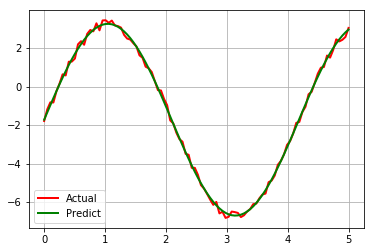

Wall time: 154 ms


In [59]:
%%time
def residual(t, x, y):
    return y - (t[0] * x ** 2 + t[1] * x + t[2])


def residual2(t, x, y):
    print(t[0], t[1])
    return y - (t[0]*np.sin(t[1]*x) + t[2])

# x = np.linspace(-2, 2, 50)
# A, B, C = 2, 3, -1
# y = (A * x ** 2 + B * x + C) + np.random.rand(len(x))*0.75

# t = leastsq(residual, [0, 0, 0], args = (x, y))
# theta = t[0]
# print('真实值：', A, B, C)
# print('预测值：', theta)
# y_hat = theta[0] * x ** 2 + theta[1] * x + theta[2]
# plt.plot(x, y, 'r-', linewidth=2, label=u'Actual')
# plt.plot(x, y_hat, 'g-', linewidth=2, label=u'Predict')
# plt.legend(loc='upper left')
# plt.grid()
# plt.show()

x = np.linspace(0, 5, 100)
a = 5
w = 1.5
phi = -2
y = a * np.sin(w * x) + phi + np.random.rand(len(x)) * 0.5

t = leastsq(residual2, [2, 2, 2], args = (x, y))
theta = t[0]
print('真实值：', a, w, phi)
print('预测值：', theta)
y_hat = theta[0] * np.sin(theta[1] * x) + theta[2]
plt.plot(x, y, 'r-', linewidth=2, label='Actual')
plt.plot(x, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In [60]:
%%time
class People:
    def __init__(self, n, a, s):
        self.name = n
        self.age = a
        self.__score = s
        self.print_people()
        # self.__print_people()   # 私有函数的作用

    def print_people(self):
        str = '%s的年龄：%d，成绩为：%.2f' % (self.name, self.age, self.__score)
        print(str)

    __print_people = print_people


class Student(People):
    def __init__(self, n, a, w):
        People.__init__(self, n, a, w)
        self.name = 'Student ' + self.name

    def print_people(self):
        str = '%s的年龄：%d' % (self.name, self.age)
        print(str)


def func(p):
    p.age = 11


if __name__ == '__main__':
    p = People('Tom', 10, 3.14159)
    func(p)     # p传入的是引用类型
    p.print_people()
    print()

    # 注意分析下面语句的打印结果，是否觉得有些“怪异”？
    j = Student('Jerry', 12, 2.71828)
    print()

    # 成员函数
    p.print_people()
    j.print_people()
    print()

    People.print_people(p)
    People.print_people(j)

Tom的年龄：10，成绩为：3.14
Tom的年龄：11，成绩为：3.14

Jerry的年龄：12

Tom的年龄：11，成绩为：3.14
Student Jerry的年龄：12

Tom的年龄：11，成绩为：3.14
Student Jerry的年龄：12，成绩为：2.72
Wall time: 0 ns


In [72]:
%%time
np.arange(1,5).cumprod()

Wall time: 0 ns


array([ 1,  2,  6, 24], dtype=int32)

In [73]:
%%time
np.sqrt(6 * np.sum(1 / np.arange(1, 100000, dtype=np.float) ** 2))

Wall time: 1 ms


3.1415831042309486

In [79]:
import numpy as np
from PIL import Image

if __name__ == '__main__':
    image_file = 'D://数据集//小象学院//5.Package//son.png'
    height = 100

    img = Image.open(image_file)
    img_width, img_height = img.size
    width = 2 * height * img_width // img_height    # 假定字符的高度是宽度的2倍
    img = img.resize((width, height), Image.ANTIALIAS)
    pixels = np.array(img.convert('L'))
    print(pixels.shape)
    print(pixels)
    chars = "MNHQ$OC?7>!:-;. "
    N = len(chars)
    step = 256 // N
    print(N)
    result = ''
    for i in range(height):
        for j in range(width):
            result += chars[pixels[i][j] // step]
        result += '\n'
    with open('text.txt', mode='w') as f:
        f.write(result)
    f.close()

(100, 154)
[[231 234 233 ..., 241 241 240]
 [231 234 233 ..., 241 241 240]
 [231 234 233 ..., 240 240 240]
 ..., 
 [215 216 217 ..., 206 202 198]
 [214 215 216 ..., 205 201 197]
 [212 213 214 ..., 203 200 196]]
16
